# Homework 2 Part 2

## Mohammed Oubia

## Classification of MNIST Digits with SVD Decomposition.

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

• Load the MNIST dataset contained in ./data/MNIST.mat with the function scipy.io.loadmat.
This dataset, which is loaded in the form of a 256 ×1707 matrix X, contains the flattened version
of 1707 16 × 16 grayscale handwritten digits. Moreover, from the same file it is possible to load
a vector I of length 1707 such that the i-th element of I is the true digit represented by the i-th
image of X.


In [2]:
data = loadmat('MNIST.mat')
X=data["X"]
Y=data["I"]
print(Y)
print(X.shape,Y.shape)

[[6 5 4 ... 7 9 8]]
(256, 1707) (1, 1707)


• Visualize a bunch of datapoints of X with the function plt.imshow.

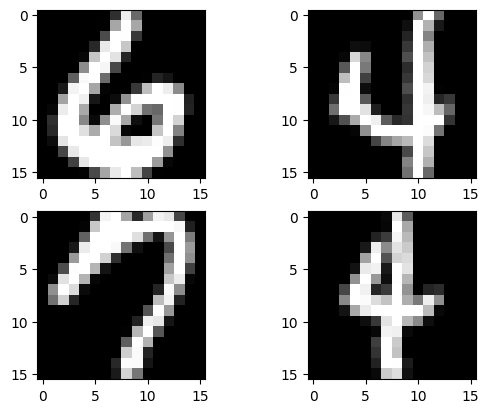

In [3]:
plt.subplot(2,2,1)
x1=np.reshape(X[:,0],(16,16))
plt.imshow(x1,cmap="gray")
plt.subplot(2,2,2)
x2=np.reshape(X[:,2],(16,16))
plt.imshow(x2,cmap="gray")
plt.subplot(2,2,3)
x3=np.reshape(X[:,10],(16,16))
plt.imshow(x3,cmap="gray")
plt.subplot(2,2,4)
x4=np.reshape(X[:,20],(16,16))
plt.imshow(x4,cmap="gray");

• Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the
classes C1 and C2 defined above.

In [5]:
c1=3
c2=4
idx_12=(Y[0,:]==c1 )|( Y[0,:]==c2)
X=X[:,idx_12]
Y=Y[:,idx_12]
print(X.shape)
print(Y.shape)

(256, 253)
(1, 253)


• Split the obtained dataset in training and testing. From now on, we will only consider the training
set. The test set will be only used at the end of the exercise to test the algorithm.

In [7]:
def split_data(X, Y, Ntrain):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]
    Xtrain = X[:, train_idx]
    print(Y.shape)
    Ytrain = Y[:,train_idx]
    Xtest = X[:, test_idx]
    Ytest = Y[0,test_idx]
    return (Xtrain, Ytrain), (Xtest, Ytest)
# Test 
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 200)
print(Xtrain.shape, Xtest.shape)

(1, 253)
(256, 200) (256, 53)


• Create the matrices X1 and X2 defined above from X.

In [8]:
def data_2split_classes(X,c1,c2):
    idx1 = (Ytrain[0,:] == c1)
    X1 = Xtrain[:, idx1]
    idx2 = (Ytrain[0,:] == c2)
    X2 = Xtrain[:, idx2]
    return X1,X2
X1,X2=data_2split_classes(Xtrain,c1,c2)

• Compute the SVD decomposition of X1 and X2 with np.linalg.svd(matrix, full matrices=False)
and denote the U-part of the two decompositions as U1 and U2.

In [9]:
U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)

def compute_y_t(Xi,y):
    Ui, si, VTi = np.linalg.svd(Xi, full_matrices=False)
    return Ui @ (Ui.T @ y)

• Take an unknown digit y from the test set, and compute y
⊥
1 = U1(U
T
1
y) and y
⊥
2 = U2(U
T
2
y).

In [10]:
max_idx=Xtest.shape[1]
r = np.random.randint(1,max_idx)
y = Xtest[:,r-1:r]
y1_t = compute_y_t(X1,y)
y2_t = compute_y_t(X2,y)

• Compute the distances d1 = ||y − y
⊥
1
||2 and d2 = ||y − y
⊥
2
||2 and classify y to C1 if d1 < d2 and
to C2 if d2 < d1.

In [13]:
def compute_distance(X1,X2,y):
    y1_t = compute_y_t(X1,y)
    y2_t = compute_y_t(X2,y)
    d1 = np.linalg.norm(y - y1_t, 2)
    d2 = np.linalg.norm(y - y2_t, 2)
    return d1,d2

In [14]:
d1,d2=compute_distance(X1,X2,y)
print(f"Distance of Y_1 is {d1}")
print(f"Distance of Y_2 is {d2}")
if d1 < d2:
    print(f"Belong to class: {c1}")
else:
    print(f"Belong to class: {c2}")

Distance of Y_1 is 2.3900506311728726
Distance of Y_2 is 1.00994569528346
Belong to class: 4


• Repeat the experiment for different values of y in the test set. Compute the misclassification
number for this algorithm.


In [15]:
def compute_classification(X1,X2,c1,c2,Xtest):
    Ypred=[]
    for i in Xtest:
        d1,d2=compute_distance(X1,X2,i)
    if d1<d2:
        Ypred.append(c1)
    else:
        Ypred.append(c2)
    return Ypred

In [16]:
def compute_missclassification_error(X1,X2,c1,c2,Xtest,Ytest):
    Ypred=compute_classification(X1,X2,c1,c2,Xtest)
    right_classified=sum((Ytest==Ypred))
    if type(right_classified)==np.int32:
        error=right_classified/len(Ytest) *100
    else:
        error=right_classified[0]/len(Ytest) *100

    print("Percentage of data correctly classified is: ",error," %")
    return

In [18]:
print("Missclassification for Training data:")
compute_missclassification_error(X1,X2,c1,c2,Xtrain.T,Ytrain)
print("Missclassification for Test data:")
compute_missclassification_error(X1,X2,c1,c2,Xtest.T,Ytest)

Missclassification for Training data:
Percentage of data correctly classified is:  100.0  %
Missclassification for Test data:


IndexError: invalid index to scalar variable.

### ___________________________________________________________________________________________

• Repeat the experiment for different digits other than 3 or 4. There is a relationship between the
visual similarity of the digits and the classification error?

In [32]:
X=data["X"]
Y=data["I"]
c1=6
c2=9
idx_12=(Y[0,:]==c1 )|( Y[0,:]==c2)
X=X[:,idx_12]
Y=Y[:,idx_12]
print("Shape of X",X.shape)
print("Shape of Y",Y.shape)
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 200)
print(f"Shape of Xtrain {Xtrain.shape}  shape of Xtest {Xtest.shape}")
X1,X2=data_2split_classes(Xtrain,c1,c2)
print("Missclassification for Training data:")
compute_missclassification_error(X1,X2,c1,c2,Xtrain.T,Ytrain)
print("Missclassification for Test data:")
compute_missclassification_error(X1,X2,c1,c2,Xtest.T,Ytest)

Shape of X (256, 283)
Shape of Y (1, 283)
(1, 283)
Shape of Xtrain (256, 200)  shape of Xtest (256, 83)
Missclassification for Training data:
Percentage of data correctly classified is:  0.0  %
Missclassification for Test data:
Percentage of data correctly classified is:  44.57831325301205  %


2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than
2 classes (say, k different classes) C1, . . . , Ck, we just need to repeat the same procedure as before for
each matrix X1, . . . , Xk to obtain the distances d1, . . . , dk. Then, the new digit y will be classified as
Ci
if di
is lower that dj for each j = 1, . . . , k.
Repeat the exercise above with a 3-digit example. Comment the differences.

In [33]:
X=data["X"]
Y=data["I"]
c1=3
c2=6
c3=9
idx_123=(Y[0,:]==c1 )|( Y[0,:]==c2)|( Y[0,:]==c3)
X=X[:,idx_123]
Y=Y[:,idx_123]
print("Shape of X",X.shape)
print("Shape of Y",Y.shape)
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 300)
print(f"Shape of Xtrain {Xtrain.shape}  shape of Xtest {Xtest.shape}")

Shape of X (256, 414)
Shape of Y (1, 414)
(1, 414)
Shape of Xtrain (256, 300)  shape of Xtest (256, 114)


In [12]:
def data_3split_classes(X,c1,c2,c3):
    idx1 = (Ytrain[0,:] == c1)
    X1 = Xtrain[:, idx1]
    idx2 = (Ytrain[0,:] == c2)
    X2 = Xtrain[:, idx2]
    idx3 = (Ytrain[0,:] == c3)
    X3 = Xtrain[:, idx3]
    return X1,X2,X3

X1,X2,X3=data_3split_classes(Xtrain,c1,c2,c3)

def compute_distance3(X1,X2,X3,y):
    y1_t = compute_y_t(X1,y)
    y2_t = compute_y_t(X2,y)
    y3_t = compute_y_t(X3,y)
    d1 = np.linalg.norm(y - y1_t, 2)
    d2 = np.linalg.norm(y - y2_t, 2)
    d3 = np.linalg.norm(y - y3_t, 2)
    return d1,d2,d3

def compute_y_t(Xi,y):
    Ui, si, VTi = np.linalg.svd(Xi, full_matrices=False)
    return Ui @ (Ui.T @ y)
 
def compute_classification3(X1,X2,c1,c2,c3,Xtest):
    Ypred=[]
    for i in Xtest:
        d1,d2,d3=compute_distance3(X1,X2,X3,i)
        mini=min(d1,d2,d3)
        if mini==d1:
            Ypred.append(c1)
        if mini==d2:
            Ypred.append(c2)
        if mini==d3:
            Ypred.append(c3)
    return Ypred
 
def compute_missclassification_error3(X1,X2,c1,c2,c3,Xtest,Ytest):
    Ypred=compute_classification3(X1,X2,c1,c2,c3,Xtest)
    right_classified=sum((Ytest==Ypred))
    if type(right_classified)==np.int32:
        error=right_classified/len(Ytest) *100
    else:
        error=right_classified[0]/len(Ytest) *100 
    print("Percentage of data correctly classified is: ",error," %")
    return

NameError: name 'c3' is not defined

In [11]:
print("Missclassification for Training data:")
compute_missclassification_error3(X1,X2,c1,c2,c3,Xtrain.T,Ytrain)
print("Missclassification for Test data:")
compute_missclassification_error3(X1,X2,c1,c2,c3,Xtest.T,Ytest)

Missclassification for Training data:


NameError: name 'compute_missclassification_error3' is not defined

The percentage is really good, but still worse than 3 and 4, the reason can be that 3 and 4 are really different from each other, while 6 and 9 seems really similar, so the distance computed is really similar.


## End